# Тестовое задание для проекта по алготрейдингу

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as pdd

Для анализа будут использоваться данные об акциях IBM на промежутке с 2016 по 2020 год.

In [2]:
start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2020-01-01')

data = pdd.DataReader('IBM', 'yahoo', start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,135.970001,134.240005,135.600006,135.949997,5229400.0,109.890060
2016-01-05,136.889999,134.850006,136.759995,135.850006,3924800.0,109.809242
2016-01-06,135.580002,133.619995,134.380005,135.169998,4310900.0,109.259583
2016-01-07,135.020004,132.429993,133.699997,132.860001,7025800.0,107.392403
2016-01-08,133.820007,131.320007,133.179993,131.630005,4762700.0,106.398170


В качестве исследуемой переменной будем использовать цену на момент закрытия торгов.

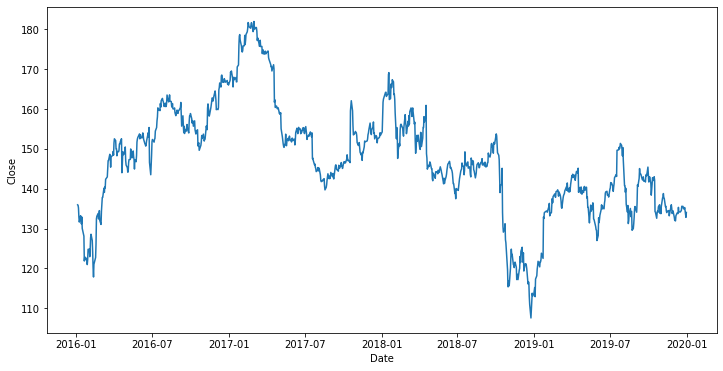

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data.index, data['Close']);

Разобьем данные на 10 одинаковых промежутков.

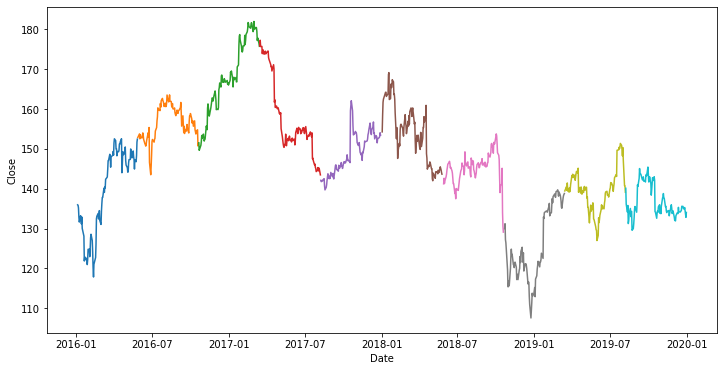

In [4]:
period = (end - start) / 10
cases = ((pd.Series(data.index) - start) / period).apply(int)
cases.index = data.index
data['case'] = cases

plt.figure(figsize=(12, 6))
for i in range(10):
    sns.lineplot(data[data['case'] == i].index, data[data['case'] == i]['Close']);

Пришло время посчитать логарифмическую доходность.

In [5]:
from math import log

data['yield'] = (data['Close'] / data['Close'].shift(1)).apply(log)
data = data[1:]

А теперь и волатильность. Поскольку мы считаем, что $\mu = 0$, вычисление волатильности превращается в вычисление среднего квадрата доходности.

In [6]:
vol = data.groupby('case')['yield'].agg(lambda x: (x * x).mean()).rename('volatility')
data = data.join(vol, on='case')

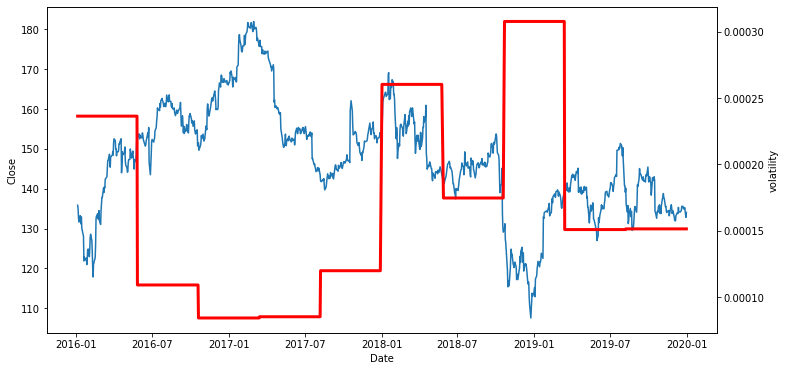

In [7]:
plt.figure(figsize=(12, 6))

sns.lineplot(data.index, data['Close'])
plt.twinx()
sns.lineplot(data.index, data['volatility'], color='red', linewidth=3);

Действительно, на графике выше несложно увидеть следующую тенденцию: чем менее стабильны акции, тем выше значение волатильности. Так, волатильность самая низкая на участке в январе 2017 года, когда наблюдался более или менее стабильный рост, и самая высокая в январе 2019 года - периоде, в течение которого цены сначала стремительно падали, потом серьезно колебались, а затем также стремительно росли.